In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd  
import seaborn as sns
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer
import matplotlib.dates as mdates
%matplotlib inline

In [3]:
# Calculate the Mean Absolute Percentage Error (MAPE) for training and testing data
def calculate_mape(y_true, y_pred):
    return (100 * abs((y_true - y_pred) / y_true)).mean()

In [4]:
df_imputed = pd.read_csv("caiso_weekly_fuel_mix_and_load_imputed_GWh.csv", parse_dates=["Week_Start", "Week_End"])

In [5]:
solar_data_imp = df_imputed[['Week_Start', 'Solar']]
wind_data_imp = df_imputed[['Week_Start', 'Wind']]
geothermal_data_imp = df_imputed[['Week_Start', 'Geothermal']]
biomass_data_imp = df_imputed[['Week_Start', 'Biomass']]
biogas_data_imp = df_imputed[['Week_Start', 'Biogas']]
small_hydro_data_imp = df_imputed[['Week_Start', 'Small Hydro']]
coal_data_imp = df_imputed[['Week_Start', 'Coal']]
nuclear_data_imp = df_imputed[['Week_Start', 'Nuclear']]
natural_gas_data_imp = df_imputed[['Week_Start', 'Natural Gas']]
large_hydro_data_imp = df_imputed[['Week_Start', 'Large Hydro']]
batteries_data_imp = df_imputed[['Week_Start', 'Batteries']]
imports_data_imp = df_imputed[['Week_Start', 'Imports']]
other_data_imp = df_imputed[['Week_Start', 'Other']]
load_data_imp = df_imputed[['Week_Start', 'CAISO_Load_GWh']]

In [6]:
# Calculate the split point (70% of data)
split_point = int(len(df_imputed) * 0.7)

# Split each imputed time series into training and testing sets
# Solar
solar_train = solar_data_imp.iloc[:split_point]
solar_test = solar_data_imp.iloc[split_point:]

# Wind
wind_train = wind_data_imp.iloc[:split_point]
wind_test = wind_data_imp.iloc[split_point:]

# Geothermal
geothermal_train = geothermal_data_imp.iloc[:split_point]
geothermal_test = geothermal_data_imp.iloc[split_point:]

# Biomass
biomass_train = biomass_data_imp.iloc[:split_point]
biomass_test = biomass_data_imp.iloc[split_point:]

# Biogas
biogas_train = biogas_data_imp.iloc[:split_point]
biogas_test = biogas_data_imp.iloc[split_point:]

# Small Hydro
small_hydro_train = small_hydro_data_imp.iloc[:split_point]
small_hydro_test = small_hydro_data_imp.iloc[split_point:]

# Coal
coal_train = coal_data_imp.iloc[:split_point]
coal_test = coal_data_imp.iloc[split_point:]

# Nuclear
nuclear_train = nuclear_data_imp.iloc[:split_point]
nuclear_test = nuclear_data_imp.iloc[split_point:]

# Natural Gas
natural_gas_train = natural_gas_data_imp.iloc[:split_point]
natural_gas_test = natural_gas_data_imp.iloc[split_point:]

# Large Hydro
large_hydro_train = large_hydro_data_imp.iloc[:split_point]
large_hydro_test = large_hydro_data_imp.iloc[split_point:]

# Batteries
batteries_train = batteries_data_imp.iloc[:split_point]
batteries_test = batteries_data_imp.iloc[split_point:]

# Imports
imports_train = imports_data_imp.iloc[:split_point]
imports_test = imports_data_imp.iloc[split_point:]

# Other
other_train = other_data_imp.iloc[:split_point]
other_test = other_data_imp.iloc[split_point:]

# Load
load_train = load_data_imp.iloc[:split_point]
load_test = load_data_imp.iloc[split_point:]

print(f"Training set size: {len(solar_train)} samples")
print(f"Testing set size: {len(solar_test)} samples")

Training set size: 266 samples
Testing set size: 115 samples


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=3050.229, Time=0.04 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=3052.133, Time=0.27 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=3054.128, Time=0.73 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=3052.134, Time=0.14 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=3054.132, Time=0.88 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=inf, Time=5.84 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=3054.118, Time=0.69 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=inf, Time=5.84 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=inf, Time=9.34 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=3034.369, Time=0.01 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=3035.572, Time=0.56 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=3037.126, Time=2.08 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=3035.494, Time=0.47 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=2.21 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=inf, Time=5.84 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=3036.754, Time=2.24 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=inf, Time=6.73 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=inf, Time=8.79 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=3034.894, Time=0.03 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=3036.434, Time=0.48 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=3038.151, Time=2.18 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=3036.397, Time=0.56 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=1.41 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,2)[52] intercept   : AIC=inf, Time=5.36 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,0)[52] intercept   : AIC=3037.941, Time=2.40 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,1)[52] intercept   : AIC=inf, Time=7.92 sec
 ARIMA(0,1,3)(0,0,0)[52] intercept   : AIC=3033.943, Time=0.03 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,1)[52] intercept   : AIC=3035.777, Time=0.77 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,2)[52] intercept   : AIC=3037.725, Time=2.68 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(1,0,0)[52] intercept   : AIC=3035.770, Time=0.65 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(1,0,1)[52] intercept   : AIC=inf, Time=2.72 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(2,0,0)[52] intercept   : AIC=3037.666, Time=3.26 sec
 ARIMA(0,1,4)(0,0,0)[52] intercept   : AIC=3035.792, Time=0.04 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(0,0,1)[52] intercept   : AIC=3037.643, Time=0.95 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(1,0,0)[52] intercept   : AIC=3037.637, Time=0.80 sec
 ARIMA(0,1,5)(0,0,0)[52] intercept   : AIC=3037.769, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=3034.057, Time=0.01 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[52] intercept   : AIC=3035.669, Time=0.30 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,2)[52] intercept   : AIC=3037.423, Time=0.96 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=3035.642, Time=0.21 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=1.69 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,2)[52] intercept   : AIC=inf, Time=5.57 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,0)[52] intercept   : AIC=3037.287, Time=0.91 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,1)[52] intercept   : AIC=inf, Time=6.53 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=inf, Time=9.40 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=3035.611, Time=0.01 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=3036.961, Time=0.72 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=3038.582, Time=2.41 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=3036.902, Time=0.59 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=2.21 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=inf, Time=8.60 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=3038.292, Time=3.12 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=inf, Time=8.31 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=3031.641, Time=0.04 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=3033.612, Time=0.90 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=3035.604, Time=4.28 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=3033.612, Time=1.35 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=2.06 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=3035.596, Time=5.71 sec
 ARIMA(1,1,3)(0,0,0)[52] intercept   : AIC=3033.376, Time=0.07 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,1)[52] intercept   : AIC=3035.339, Time=2.12 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(1,0,0)[52] intercept   : AIC=3035.339, Time=1.69 sec
 ARIMA(1,1,4)(0,0,0)[52] intercept   : AIC=3035.345, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[52] intercept   : AIC=3035.258, Time=0.01 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,1)[52] intercept   : AIC=3036.437, Time=0.40 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,2)[52] intercept   : AIC=3038.026, Time=1.36 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,0)[52] intercept   : AIC=3036.357, Time=0.29 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=2.04 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,2)[52] intercept   : AIC=inf, Time=7.28 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,0)[52] intercept   : AIC=3037.659, Time=2.54 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,1)[52] intercept   : AIC=inf, Time=8.39 sec
 ARIMA(2,1,1)(0,0,0)[52] intercept   : AIC=3036.772, Time=0.05 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,1)[52] intercept   : AIC=3038.009, Time=1.15 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,2)[52] intercept   : AIC=3039.692, Time=3.90 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[52] intercept   : AIC=3037.962, Time=0.61 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=2.43 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,0,0)[52] intercept   : AIC=3039.385, Time=4.36 sec
 ARIMA(2,1,2)(0,0,0)[52] intercept   : AIC=3036.071, Time=0.08 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[52] intercept   : AIC=3037.887, Time=1.02 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[52] intercept   : AIC=3037.862, Time=2.08 sec
 ARIMA(2,1,3)(0,0,0)[52] intercept   : AIC=3035.295, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[52] intercept   : AIC=3035.083, Time=0.01 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,1)[52] intercept   : AIC=3036.825, Time=0.45 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,2)[52] intercept   : AIC=3038.742, Time=1.30 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,0)[52] intercept   : AIC=3036.809, Time=0.53 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=2.18 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,0,0)[52] intercept   : AIC=3038.632, Time=2.51 sec
 ARIMA(3,1,1)(0,0,0)[52] intercept   : AIC=3033.307, Time=0.06 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,1)[52] intercept   : AIC=3035.290, Time=1.63 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,0,0)[52] intercept   : AIC=3035.290, Time=1.29 sec
 ARIMA(3,1,2)(0,0,0)[52] intercept   : AIC=3035.235, Time=0.08 sec
 ARIMA(4,1,0)(0,0,0)[52] intercept   : AIC=3034.807, Time=0.04 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,1)[52] intercept   : AIC=3036.749, Time=1.27 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(1,0,0)[52] intercept   : AIC=3036.747, Time=1.00 sec
 ARIMA(4,1,1)(0,0,0)[52] intercept   : AIC=3035.231, Time=0.09 sec
 ARIMA(5,1,0)(0,0,0)[52] intercept   : AIC=3036.805, Time=0.04 sec

Best model:  ARIMA(1,1,2)(0,0,0)[52] intercept


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Total fit time: 205.853 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  266
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1510.821
Date:                Tue, 05 Aug 2025   AIC                           3031.641
Time:                        09:16:43   BIC                           3049.540
Sample:                             0   HQIC                          3038.833
                                - 266                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2889      0.768      0.376      0.707      -1.216       1.794
ar.L1          0.8552      0.123      6.925      0.000       0.613       1.097
ma.L1         -1.152

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


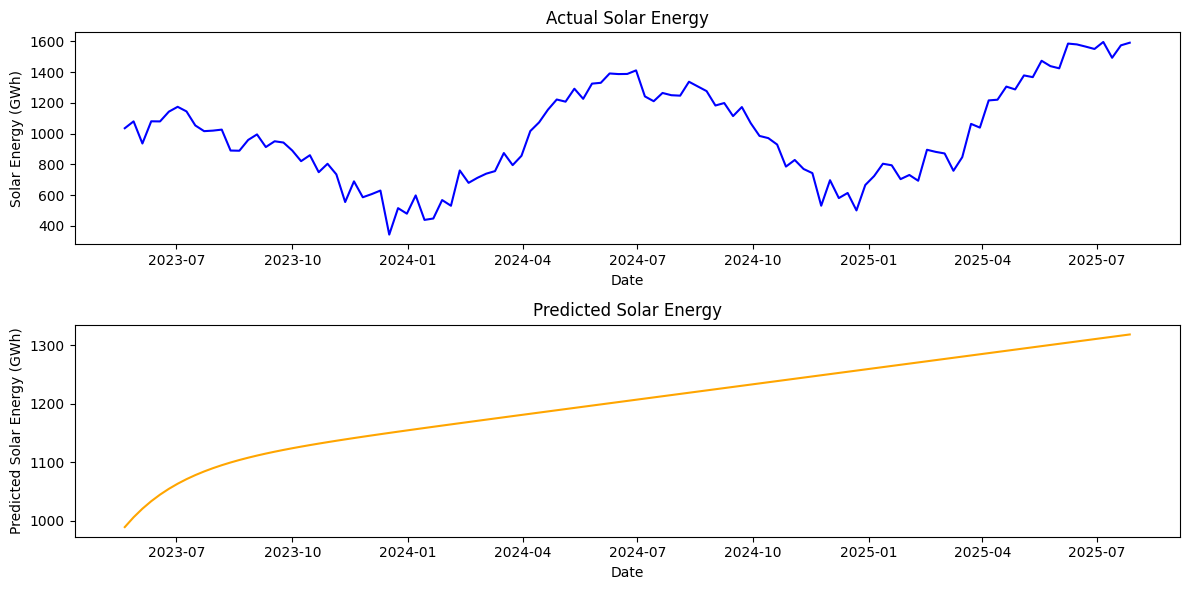

In [62]:
# Fit an auto_arima model to the solar training data
solar_arima_model = auto_arima(
    solar_train["Solar"],
    seasonal=True,
    m=52,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    # information_criterion='aicc',
    # start_p=1, start_q=0,            # lower bounds
    # max_p=4,  max_q=4,               # let it explore more AR & MA lags
    # start_P=1, start_Q=0,
    # max_P=4,  max_Q=3,
    # d=None,  D=None,
    stepwise=False
)
print(solar_arima_model.summary())
predicted_values = solar_arima_model.predict(n_periods=len(solar_test))
actual_values = solar_test['Solar']
mape_solar = calculate_mape(actual_values, predicted_values)
print(mape_solar)
# Create two separate plots for actual and predicted solar data
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Actual sales data scatter plot
axes[0].plot(solar_test['Week_Start'], actual_values, color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Solar Energy (GWh)')
axes[0].set_title('Actual Solar Energy')

# Predicted sales data scatter plot
axes[1].plot(solar_test['Week_Start'], predicted_values, color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Predicted Solar Energy (GWh)')
axes[1].set_title('Predicted Solar Energy')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

In [63]:
# Extract the parameters
p, d, q = solar_arima_model.order
P, D, Q, s = solar_arima_model.seasonal_order

print(f"The ARIMA parameters are p = {p}, d = {d}, q = {q}")
print(f"The seasonal ARIMA parameters are P = {P}, D = {D}, Q = {Q}")

The ARIMA parameters are p = 1, d = 1, q = 2
The seasonal ARIMA parameters are P = 0, D = 0, Q = 0


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=3231.401, Time=0.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=3168.120, Time=0.21 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=3145.216, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=3229.401, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=3143.589, Time=0.02 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=3145.178, Time=0.59 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=3146.801, Time=1.10 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=3144.173, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=3143.919, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=3166.137, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=3144.086, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[52]             : AIC=3141.595, Time=0.01 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(0,1,1)(1,0,0)[52]             : AIC=3143.181, Time=0.25 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[52]             : AIC=3143.219, Time=0.48 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[52]             : AIC=3144.804, Time=0.97 sec
 ARIMA(1,1,1)(0,0,0)[52]             : AIC=3142.177, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[52]             : AIC=3141.926, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[52]             : AIC=3164.141, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[52]             : AIC=3142.093, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[52]          
Total fit time: 6.774 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  266
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1568.798
Date:                Mon, 04 Aug 2025   AIC                           3141.595
Time:                        12:18:02   BIC                           3148.755
Sample:                             0   HQIC                          3144.472
                                - 266                                         
Covariance Type:                  

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

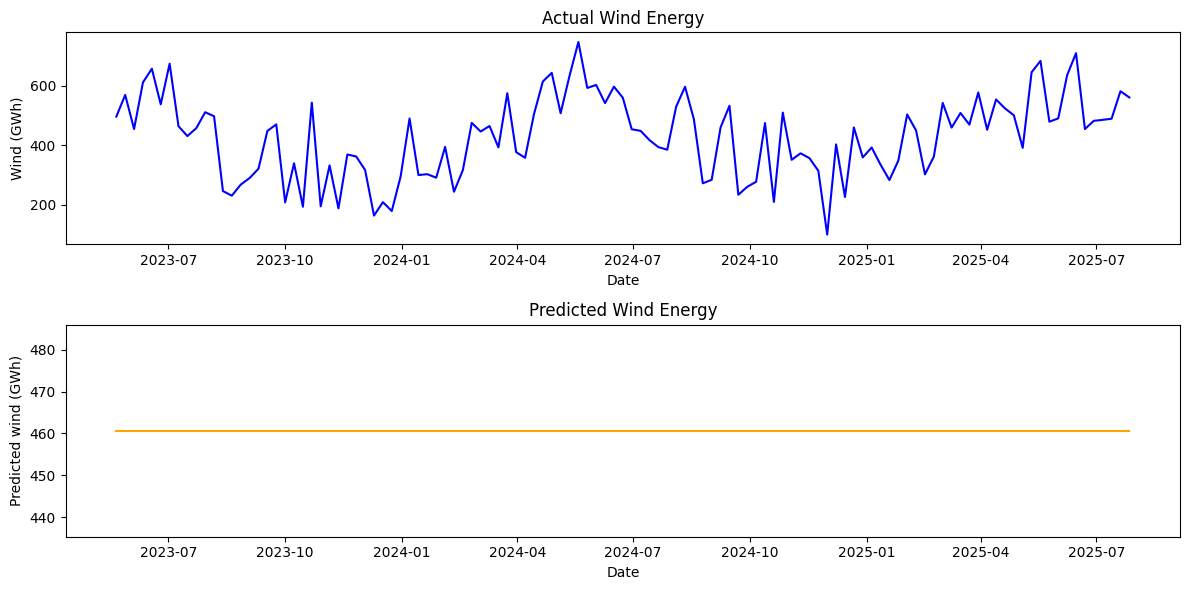

In [ ]:
# Fit an auto_arima model to the wind training data
wind_arima_model = auto_arima(
    wind_train["Wind"],
    seasonal=True,
    m=52,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)
print(wind_arima_model.summary())
predicted_wind = wind_arima_model.predict(n_periods=len(wind_test))
actual_wind = wind_test['Wind']
mape_wind = calculate_mape(actual_wind, predicted_wind)
print(mape_wind)
# Create two separate plots for actual and predicted wind data
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Actual wind data plot
axes[0].plot(wind_test['Week_Start'], actual_wind, color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Wind (GWh)')
axes[0].set_title('Actual Wind Energy')

# Predicted wind data plot
axes[1].plot(wind_test['Week_Start'], predicted_wind, color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Predicted Wind (GWh)')
axes[1].set_title('Predicted Wind Energy')

plt.tight_layout()
plt.show()


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=inf, Time=2.90 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=2190.974, Time=0.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=1985.992, Time=1.47 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=2031.796, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=3427.244, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=1985.703, Time=0.01 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=1985.973, Time=0.67 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=1987.883, Time=1.90 sec
 ARIMA(2,0,0)(0,0,0)[52] intercept   : AIC=1983.544, Time=0.02 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,0)[52] intercept   : AIC=1984.295, Time=1.02 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,1)[52] intercept   : AIC=1983.920, Time=0.97 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,1)[52] intercept   : AIC=1986.138, Time=2.38 sec
 ARIMA(3,0,0)(0,0,0)[52] intercept   : AIC=1976.934, Time=0.02 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(1,0,0)[52] intercept   : AIC=1976.944, Time=2.19 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,1)[52] intercept   : AIC=1976.953, Time=1.11 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(1,0,1)[52] intercept   : AIC=1980.189, Time=2.70 sec
 ARIMA(4,0,0)(0,0,0)[52] intercept   : AIC=1978.756, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[52] intercept   : AIC=1977.203, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[52] intercept   : AIC=1981.229, Time=0.07 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(4,0,1)(0,0,0)[52] intercept   : AIC=1980.699, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[52]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(3,0,0)(0,0,0)[52] intercept
Total fit time: 18.262 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  266
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -983.467
Date:                Mon, 04 Aug 2025   AIC                           1976.934
Time:                        12:22:48   BIC                           1994.852
Sample:                             0   HQIC                          1984.132
                                - 266                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
in

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


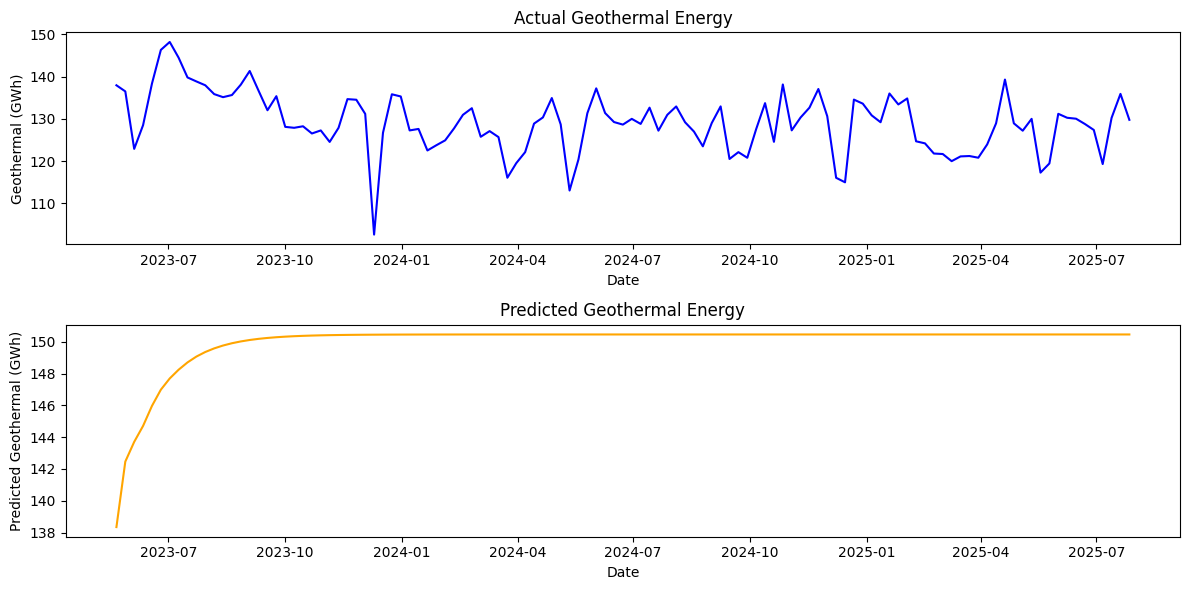

In [ ]:
# Fit an auto_arima model to the geothermal training data
geothermal_arima_model = auto_arima(
    geothermal_train["Geothermal"],
    seasonal=True,
    m=52,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)
print(geothermal_arima_model.summary())
predicted_geothermal = geothermal_arima_model.predict(n_periods=len(geothermal_test))
actual_geothermal = geothermal_test['Geothermal']
mape_geothermal = calculate_mape(actual_geothermal, predicted_geothermal)
print(mape_geothermal)
# Create two separate plots for actual and predicted geothermal data
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Actual geothermal data plot
axes[0].plot(geothermal_test['Week_Start'], actual_geothermal, color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Geothermal (GWh)')
axes[0].set_title('Actual Geothermal Energy')

# Predicted geothermal data plot
axes[1].plot(load_test['Week_Start'], predicted_geothermal, color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Predicted Geothermal (GWh)')
axes[1].set_title('Predicted Geothermal Energy')

plt.tight_layout()
plt.show()

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=1637.050, Time=0.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=1622.036, Time=0.34 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=1614.446, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=1635.062, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=1623.993, Time=0.01 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=0.73 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=1613.208, Time=1.29 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=inf, Time=3.11 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=1631.177, Time=1.20 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=inf, Time=6.38 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=1599.934, Time=1.32 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=1602.191, Time=0.43 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,2)[52] intercept   : AIC=inf, Time=3.44 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=0.73 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=1601.885, Time=2.05 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,2)[52] intercept   : AIC=1601.830, Time=2.08 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,2)[52] intercept   : AIC=1600.874, Time=8.57 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,2)[52]             : AIC=1597.936, Time=1.17 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[52]             : AIC=1600.191, Time=0.41 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,2)[52]             : AIC=inf, Time=3.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[52]             : AIC=inf, Time=0.62 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[52]             : AIC=1611.217, Time=1.18 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,2)[52]             : AIC=1599.886, Time=1.81 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,2)[52]             : AIC=1599.832, Time=1.64 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,2)[52]             : AIC=1597.163, Time=3.22 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[52]             : AIC=1597.128, Time=0.78 sec
 ARIMA(1,1,1)(0,0,0)[52]             : AIC=1608.598, Time=0.02 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[52]             : AIC=inf, Time=1.26 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[52]             : AIC=1594.500, Time=0.64 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,0)[52]             : AIC=1594.238, Time=2.70 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,1)[52]             : AIC=inf, Time=7.26 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[52]             : AIC=1608.016, Time=0.88 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,0)[52]             : AIC=1620.890, Time=0.75 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,0,0)[52]             : AIC=1593.686, Time=2.54 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[52]             : AIC=1596.402, Time=0.58 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,0,1)[52]             : AIC=inf, Time=5.27 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[52]             : AIC=inf, Time=1.24 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,0)[52]             : AIC=1602.829, Time=1.23 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(2,0,0)[52]             : AIC=1593.770, Time=1.72 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,0)[52]             : AIC=1591.847, Time=2.55 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[52]             : AIC=1593.174, Time=0.59 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[52]             : AIC=inf, Time=6.98 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,1)[52]             : AIC=inf, Time=1.04 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,0)[52]             : AIC=1595.835, Time=1.85 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(2,0,0)[52]             : AIC=1593.800, Time=3.27 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(2,0,0)[52]             : AIC=1593.794, Time=3.80 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(2,0,0)[52]             : AIC=1594.828, Time=7.48 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(2,0,0)[52]             : AIC=1593.712, Time=7.62 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,0)[52] intercept   : AIC=1593.842, Time=3.95 sec

Best model:  ARIMA(2,1,2)(2,0,0)[52]          
Total fit time: 112.541 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  266
Model:             SARIMAX(2, 1, 2)x(2, 0, [], 52)   Log Likelihood                -788.923
Date:                             Mon, 04 Aug 2025   AIC                           1591.847
Time:                                     12:26:18   BIC                           1616.905
Sample:                                          0   HQIC                          1601.915
                                             - 266                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


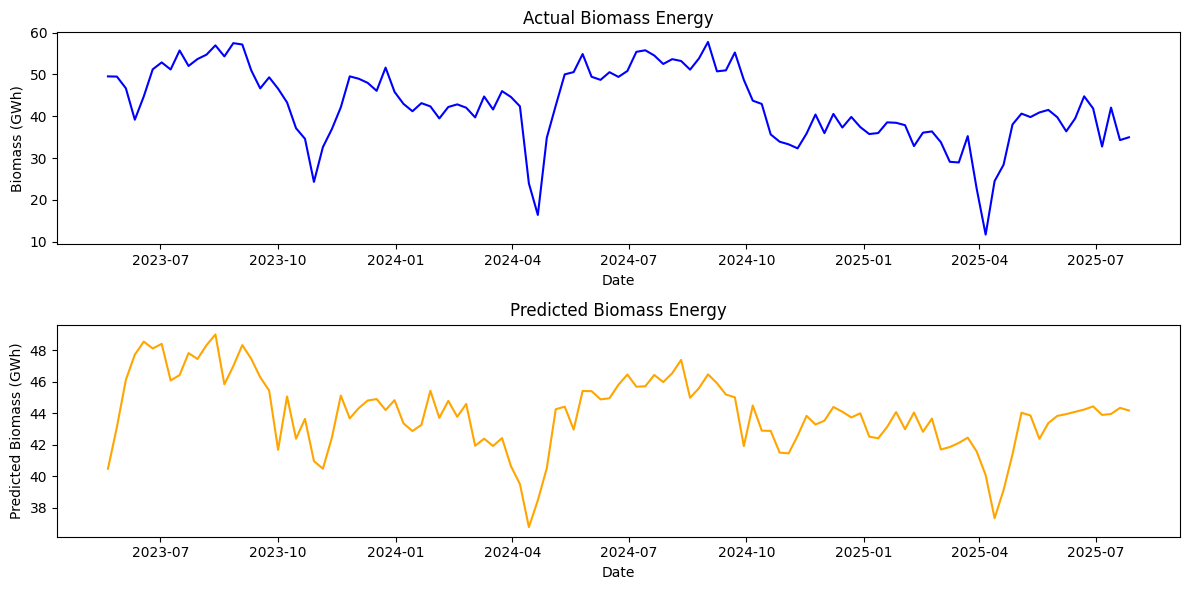

In [ ]:
# Fit an auto_arima model to the biomass training data
biomass_arima_model = auto_arima(
    biomass_train["Biomass"],
    seasonal=True,
    m=52,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)
print(biomass_arima_model.summary())
predicted_biomass = biomass_arima_model.predict(n_periods=len(biomass_test))
actual_biomass = biomass_test['Biomass']
mape_biomass = calculate_mape(actual_biomass, predicted_biomass)
print(mape_biomass)
# Create two separate plots for actual and predicted biomass data
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Actual biomass data plot
axes[0].plot(biomass_test['Week_Start'], actual_biomass, color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Biomass (GWh)')
axes[0].set_title('Actual Biomass Energy')

# Predicted biomass data plot
axes[1].plot(biomass_test['Week_Start'], predicted_biomass, color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Predicted Biomass (GWh)')
axes[1].set_title('Predicted Biomass Energy')

plt.tight_layout()
plt.show()

Performing stepwise search to minimize aic


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=930.649, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=962.706, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=949.650, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=946.239, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=960.707, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=928.946, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=943.700, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=928.437, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=928.750, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=949.301, Time=0.01 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(1,1,1)(0,0,0)[0]             : AIC=927.321, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=944.240, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=947.650, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=927.944, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=928.134, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=941.717, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=947.301, Time=0.01 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=929.803, Time=0.05 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.465 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  266
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -460.660
Date:                Mon, 04 Aug 2025   AIC                            927.321
Time:                        12:33:09   BIC                            938.060
Sample:                             0   HQIC                           931.635
                                - 266                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6288      0.071      8.840      0.000       0.489  

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


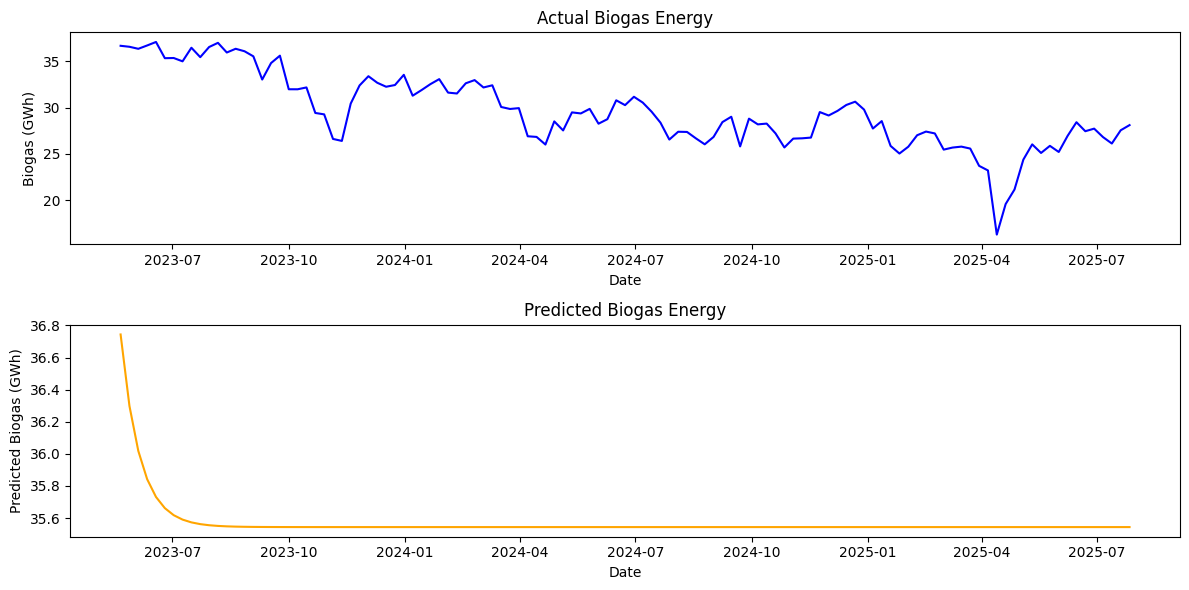

In [ ]:
# Fit an auto_arima model to the biogas training data
biogas_arima_model = auto_arima(
    biogas_train["Biogas"],
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)
print(biogas_arima_model.summary())
predicted_biogas = biogas_arima_model.predict(n_periods=len(biogas_test))
actual_biogas = biogas_test['Biogas']
mape_biogas = calculate_mape(actual_biogas, predicted_biogas)
print(mape_biogas)
# Create two separate plots for actual and predicted biogas data
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Actual biogas data plot
axes[0].plot(biomass_test['Week_Start'], actual_biogas, color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Biogas (GWh)')
axes[0].set_title('Actual Biogas Energy')

# Predicted biogas data plot
axes[1].plot(load_test['Week_Start'], predicted_biogas, color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Predicted Biogas (GWh)')
axes[1].set_title('Predicted Biogas Energy')

plt.tight_layout()
plt.show()

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1652.373, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1641.450, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1640.038, Time=0.01 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1638.551, Time=0.02 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1640.019, Time=0.03 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1640.169, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1640.124, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1642.118, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1639.300, Time=0.03 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1639.314, Time=0.05 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1641.313, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1642.111, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1641.466, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1640.804, Time=0.06 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1641.310, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1636.821, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1638.815, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1639.964, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1638.819, Time=0.03 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1640.401, Time=0.09 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1640.070, Time=0.03 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 0.765 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  266
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -813.410
Date:                Mon, 04 Aug 2025   AIC                           1636.821
Time:                        12:34:26   BIC                           1654.720
Sample:                             0   HQIC                          1644.012
                                - 266                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
i

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


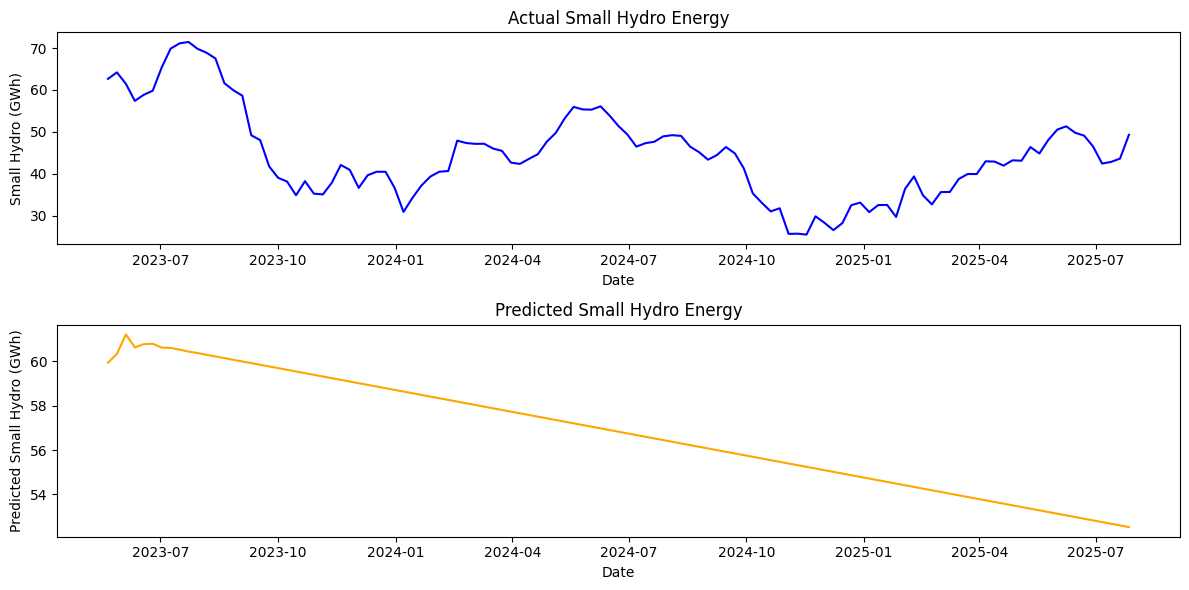

In [ ]:
# Fit an auto_arima model to the small hydro training data
small_hydro_arima_model = auto_arima(
    small_hydro_train["Small Hydro"],
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=False
)
print(small_hydro_arima_model.summary())
predicted_small_hydro = small_hydro_arima_model.predict(n_periods=len(small_hydro_test))
actual_small_hydro = small_hydro_test['Small Hydro']
mape_small_hydro = calculate_mape(actual_small_hydro, predicted_small_hydro)
print(mape_small_hydro)
# Create two separate plots for actual and predicted small hydro data
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Actual small hydro data plot
axes[0].plot(biomass_test['Week_Start'], actual_small_hydro, color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Small Hydro (GWh)')
axes[0].set_title('Actual Small Hydro Energy')

# Predicted small hydro data plot
axes[1].plot(load_test['Week_Start'], predicted_small_hydro, color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Predicted Small Hydro (GWh)')
axes[1].set_title('Predicted Small Hydro Energy')

plt.tight_layout()
plt.show()

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=439.617, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=421.681, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=418.490, Time=0.02 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=414.941, Time=0.03 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=408.424, Time=0.05 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=410.415, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=426.426, Time=0.01 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=406.185, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=407.443, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=419.689, Time=0.05 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=410.376, Time=0.09 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=423.958, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=407.399, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=407.589, Time=0.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=407.645, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=424.981, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=409.386, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=407.029, Time=0.10 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=421.365, Time=0.03 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=410.064, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=423.206, Time=0.03 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.077 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  266
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -199.093
Date:                Mon, 04 Aug 2025   AIC                            406.185
Time:                        12:38:02   BIC                            420.504
Sample:                             0   HQIC                           411.938
                                - 266                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


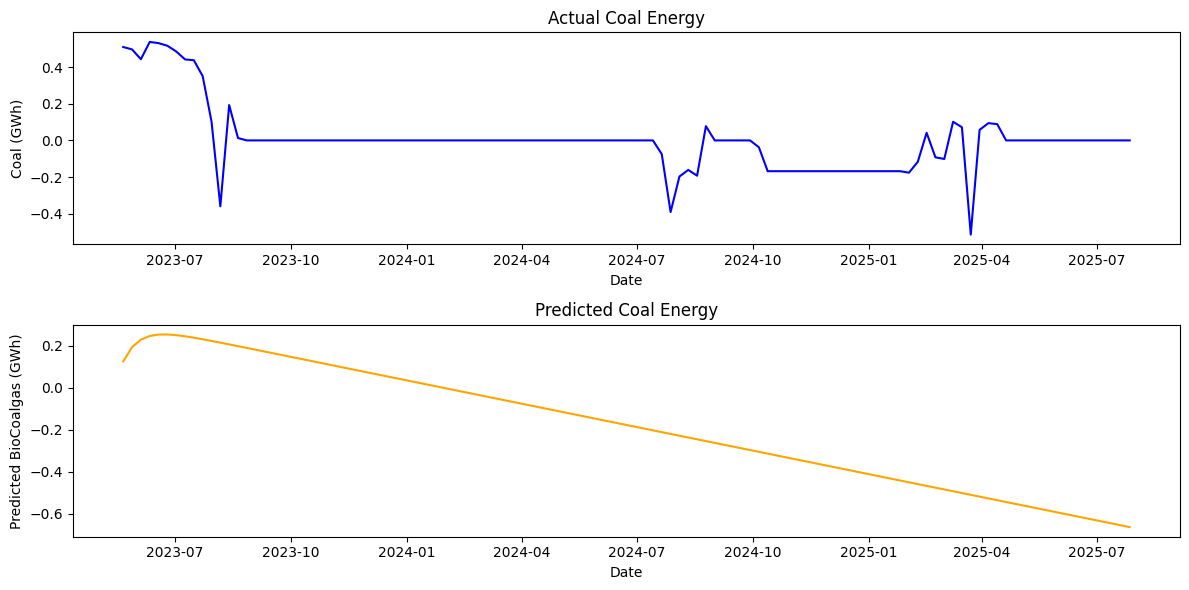

In [ ]:
# Fit an auto_arima model to the coal training data
coal_arima_model = auto_arima(
    coal_train["Coal"],
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=False
)
print(coal_arima_model.summary())
predicted_coal = coal_arima_model.predict(n_periods=len(coal_test))
actual_coal = coal_test['Coal']
mape_coal = calculate_mape(actual_coal, predicted_coal)
print(mape_coal)
# Create two separate plots for actual and predicted coal data
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Actual coal data plot
axes[0].plot(coal_test['Week_Start'], actual_coal, color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Coal (GWh)')
axes[0].set_title('Actual Coal Energy')

# Predicted coal data plot
axes[1].plot(coal_test['Week_Start'], predicted_coal, color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Predicted BioCoalgas (GWh)')
axes[1].set_title('Predicted Coal Energy')

plt.tight_layout()
plt.show()

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2801.879, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3860.129, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3534.060, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2799.491, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3314.924, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2798.997, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2801.571, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2799.559, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2771.565, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2909.756, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2778.806, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2773.305, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2773.422, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : 

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2771.309, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2773.308, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2775.305, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.507 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  266
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1381.655
Date:                Mon, 04 Aug 2025   AIC                           2771.309
Time:                        12:42:03   BIC                           2785.643
Sample:                             0   HQIC                          2777.068
                                - 266                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


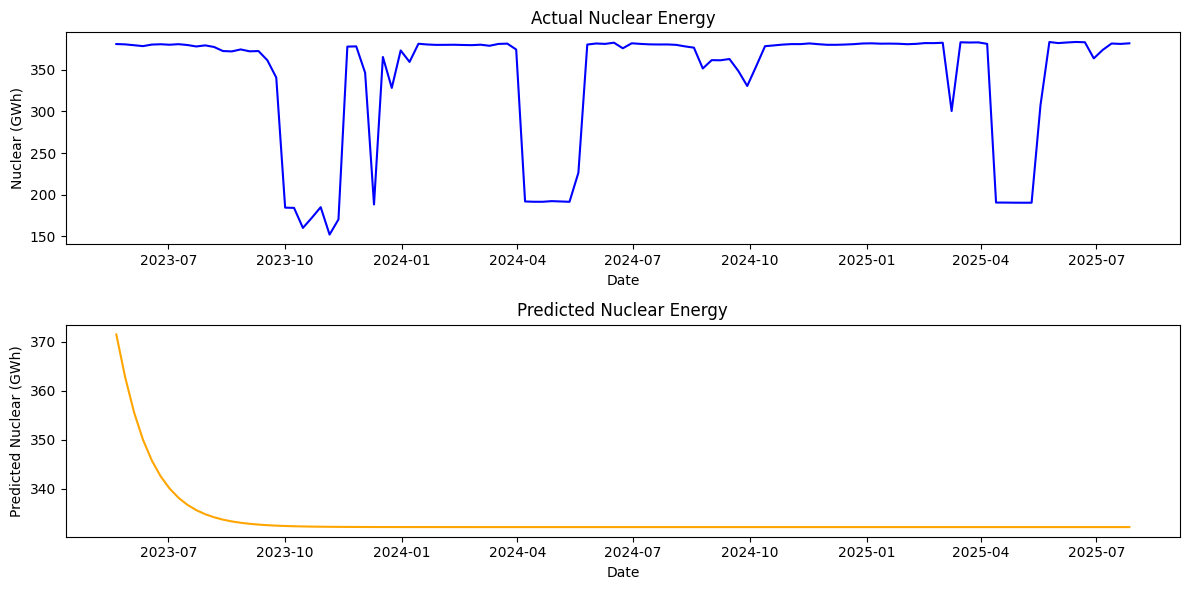

In [19]:
# Fit an auto_arima model to the nuclear training data
nuclear_arima_model = auto_arima(
    nuclear_train["Nuclear"],
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)
print(nuclear_arima_model.summary())
predicted_nuclear = nuclear_arima_model.predict(n_periods=len(nuclear_test))
actual_nuclear = nuclear_test['Nuclear']
mape_nuclear = calculate_mape(actual_nuclear, predicted_nuclear)
print(mape_nuclear)
# Create two separate plots for actual and predicted nuclear data
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Actual nuclear data plot
axes[0].plot(nuclear_test['Week_Start'], actual_nuclear, color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Nuclear (GWh)')
axes[0].set_title('Actual Nuclear Energy')

# Predicted nuclear data plot
axes[1].plot(nuclear_test['Week_Start'], predicted_nuclear, color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Predicted Nuclear (GWh)')
axes[1].set_title('Predicted Nuclear Energy')

plt.tight_layout()
plt.show()

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=3777.851, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=3779.851, Time=0.25 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=3781.824, Time=0.70 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=3779.851, Time=0.12 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=3781.851, Time=0.29 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=inf, Time=3.15 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=3781.823, Time=0.79 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=inf, Time=2.87 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=inf, Time=3.09 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=3741.890, Time=0.02 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=3740.873, Time=0.58 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=3742.320, Time=2.17 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=3740.507, Time=0.53 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=1.86 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=inf, Time=8.09 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=3741.419, Time=2.43 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=inf, Time=7.35 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=inf, Time=8.05 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=3743.853, Time=0.02 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=3742.789, Time=0.55 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=3744.274, Time=2.10 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=3742.432, Time=0.73 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=1.65 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,2)[52] intercept   : AIC=inf, Time=6.76 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,0)[52] intercept   : AIC=3743.400, Time=3.09 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,1)[52] intercept   : AIC=inf, Time=8.10 sec
 ARIMA(0,1,3)(0,0,0)[52] intercept   : AIC=3745.620, Time=0.01 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,1)[52] intercept   : AIC=3744.667, Time=0.91 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,2)[52] intercept   : AIC=3746.239, Time=1.35 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(1,0,0)[52] intercept   : AIC=3744.395, Time=0.36 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(1,0,1)[52] intercept   : AIC=inf, Time=2.63 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(2,0,0)[52] intercept   : AIC=3745.322, Time=3.60 sec
 ARIMA(0,1,4)(0,0,0)[52] intercept   : AIC=3746.571, Time=0.05 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(0,0,1)[52] intercept   : AIC=3746.166, Time=1.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(1,0,0)[52] intercept   : AIC=3745.886, Time=0.99 sec
 ARIMA(0,1,5)(0,0,0)[52] intercept   : AIC=3748.487, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=3747.231, Time=0.01 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[52] intercept   : AIC=3747.272, Time=0.39 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,2)[52] intercept   : AIC=3749.188, Time=1.06 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=3747.180, Time=0.23 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=1.78 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,2)[52] intercept   : AIC=inf, Time=7.86 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,0)[52] intercept   : AIC=3748.996, Time=1.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,1)[52] intercept   : AIC=inf, Time=7.91 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=inf, Time=8.22 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=3743.872, Time=0.01 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=3742.878, Time=0.46 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=3744.277, Time=3.16 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=3742.532, Time=0.41 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=2.47 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=inf, Time=9.56 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=3743.393, Time=3.10 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=inf, Time=8.78 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=3745.908, Time=0.02 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=3744.935, Time=0.35 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=3746.125, Time=5.15 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=3744.259, Time=1.54 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=1.90 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=3744.934, Time=7.04 sec
 ARIMA(1,1,3)(0,0,0)[52] intercept   : AIC=3747.042, Time=0.07 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,1)[52] intercept   : AIC=3746.814, Time=0.57 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(1,0,0)[52] intercept   : AIC=3746.460, Time=0.42 sec
 ARIMA(1,1,4)(0,0,0)[52] intercept   : AIC=3747.734, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[52] intercept   : AIC=3744.352, Time=0.01 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,1)[52] intercept   : AIC=3743.681, Time=0.44 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,2)[52] intercept   : AIC=3745.365, Time=1.06 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,0)[52] intercept   : AIC=3743.439, Time=0.29 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=2.17 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,2)[52] intercept   : AIC=inf, Time=8.19 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,0)[52] intercept   : AIC=3744.817, Time=1.39 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,1)[52] intercept   : AIC=inf, Time=8.96 sec
 ARIMA(2,1,1)(0,0,0)[52] intercept   : AIC=3745.735, Time=0.03 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,1)[52] intercept   : AIC=3744.809, Time=0.63 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,2)[52] intercept   : AIC=3746.318, Time=2.12 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[52] intercept   : AIC=3744.473, Time=0.61 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=2.50 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,0,0)[52] intercept   : AIC=3745.345, Time=4.76 sec
 ARIMA(2,1,2)(0,0,0)[52] intercept   : AIC=3746.477, Time=0.10 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[52] intercept   : AIC=3746.290, Time=1.53 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[52] intercept   : AIC=3746.031, Time=2.36 sec
 ARIMA(2,1,3)(0,0,0)[52] intercept   : AIC=3748.848, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[52] intercept   : AIC=3745.434, Time=0.01 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,1)[52] intercept   : AIC=3744.624, Time=0.47 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,2)[52] intercept   : AIC=3746.025, Time=3.06 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,0)[52] intercept   : AIC=3744.303, Time=0.24 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=1.81 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,0,0)[52] intercept   : AIC=3745.183, Time=2.95 sec
 ARIMA(3,1,1)(0,0,0)[52] intercept   : AIC=3746.053, Time=0.08 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,1)[52] intercept   : AIC=3745.973, Time=1.30 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,0,0)[52] intercept   : AIC=3745.643, Time=1.71 sec
 ARIMA(3,1,2)(0,0,0)[52] intercept   : AIC=3749.487, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[52] intercept   : AIC=3747.241, Time=0.01 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,1)[52] intercept   : AIC=3746.536, Time=0.95 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(1,0,0)[52] intercept   : AIC=3746.211, Time=1.04 sec
 ARIMA(4,1,1)(0,0,0)[52] intercept   : AIC=3749.202, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[52] intercept   : AIC=3748.951, Time=0.02 sec

Best model:  ARIMA(0,1,1)(1,0,0)[52] intercept


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Total fit time: 201.275 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  266
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 52)   Log Likelihood               -1866.253
Date:                             Mon, 04 Aug 2025   AIC                           3740.507
Time:                                     12:50:15   BIC                           3754.825
Sample:                                          0   HQIC                          3746.260
                                             - 266                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3227     10.041      0.032      0.974     -19.358      20

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


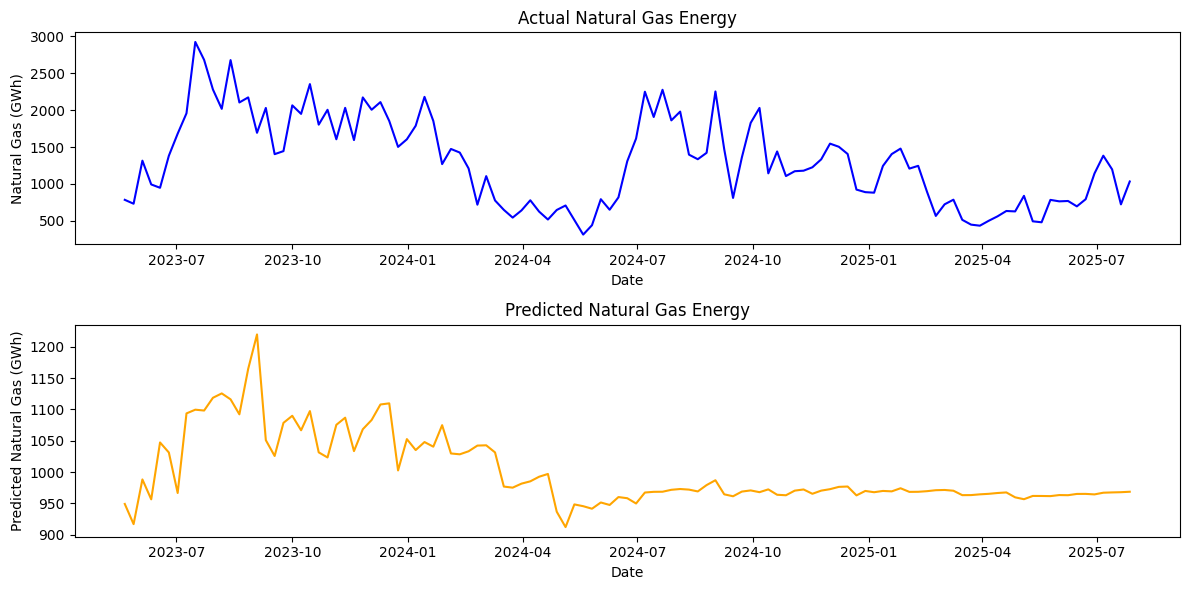

In [ ]:
# Fit an auto_arima model to the natural gas training data
ng_arima_model = auto_arima(
    natural_gas_train["Natural Gas"],
    seasonal=True,
    m=52,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=False
)
print(ng_arima_model.summary())
predicted_ng = ng_arima_model.predict(n_periods=len(natural_gas_test))
actual_ng = natural_gas_test['Natural Gas']
mape_ng = calculate_mape(actual_ng, predicted_ng)
print(mape_ng)
# Create two separate plots for actual and predicted natural gas data
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Actual natural gas data plot
axes[0].plot(natural_gas_test['Week_Start'], actual_ng, color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Natural Gas (GWh)')
axes[0].set_title('Actual Natural Gas Energy')

# Predicted natural gas data plot
axes[1].plot(natural_gas_test['Week_Start'], predicted_ng, color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Predicted Natural Gas (GWh)')
axes[1].set_title('Predicted Natural Gas Energy')

plt.tight_layout()
plt.show()

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=2649.849, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=2648.702, Time=0.54 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=2649.812, Time=1.94 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=2649.166, Time=0.40 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=0.86 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=2651.698, Time=5.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=2650.053, Time=2.09 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=2651.693, Time=3.81 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=inf, Time=4.15 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=2650.181, Time=0.02 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=2649.792, Time=0.45 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=2650.787, Time=1.78 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=2650.174, Time=0.56 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=1.18 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=2652.679, Time=3.53 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=2650.982, Time=1.91 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=2652.668, Time=3.61 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,2)[52] intercept   : AIC=2654.648, Time=5.68 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=2651.469, Time=0.03 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=2651.147, Time=0.50 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,2)[52] intercept   : AIC=2652.200, Time=1.76 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=2651.511, Time=0.51 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=1.02 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,2)[52] intercept   : AIC=2654.116, Time=3.67 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,0)[52] intercept   : AIC=2652.368, Time=1.98 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,1)[52] intercept   : AIC=2654.101, Time=4.43 sec
 ARIMA(0,1,3)(0,0,0)[52] intercept   : AIC=2651.841, Time=0.04 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,1)[52] intercept   : AIC=2651.785, Time=0.74 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,2)[52] intercept   : AIC=2652.625, Time=2.53 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(1,0,0)[52] intercept   : AIC=2652.136, Time=0.63 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(1,0,1)[52] intercept   : AIC=inf, Time=1.29 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(2,0,0)[52] intercept   : AIC=2652.765, Time=2.64 sec
 ARIMA(0,1,4)(0,0,0)[52] intercept   : AIC=2651.786, Time=0.06 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(0,0,1)[52] intercept   : AIC=2650.938, Time=0.91 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(1,0,0)[52] intercept   : AIC=2651.536, Time=0.77 sec
 ARIMA(0,1,5)(0,0,0)[52] intercept   : AIC=2653.437, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=2650.357, Time=0.01 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[52] intercept   : AIC=2649.890, Time=0.52 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,2)[52] intercept   : AIC=2650.891, Time=1.78 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=2650.281, Time=0.42 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=1.27 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,2)[52] intercept   : AIC=2652.779, Time=4.65 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,0)[52] intercept   : AIC=2651.093, Time=1.79 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,1)[52] intercept   : AIC=2652.773, Time=3.71 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,2)[52] intercept   : AIC=2654.749, Time=7.26 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=2651.114, Time=0.03 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=2651.017, Time=1.05 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=2652.054, Time=3.08 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=2651.348, Time=0.48 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=1.65 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=2653.975, Time=3.83 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=2652.204, Time=3.62 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=2653.957, Time=6.57 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=2653.069, Time=0.05 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=2652.891, Time=1.04 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,2)[52] intercept   : AIC=2653.938, Time=3.92 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=2653.236, Time=1.31 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=1.92 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=2654.092, Time=6.42 sec
 ARIMA(1,1,3)(0,0,0)[52] intercept   : AIC=2652.005, Time=0.05 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,1)[52] intercept   : AIC=2651.832, Time=1.58 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(1,0,0)[52] intercept   : AIC=2652.242, Time=1.25 sec
 ARIMA(1,1,4)(0,0,0)[52] intercept   : AIC=2653.575, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[52] intercept   : AIC=2651.716, Time=0.03 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,1)[52] intercept   : AIC=2651.258, Time=0.58 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,2)[52] intercept   : AIC=2652.338, Time=2.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,0)[52] intercept   : AIC=2651.637, Time=0.55 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=1.45 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,2)[52] intercept   : AIC=2654.254, Time=4.21 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,0)[52] intercept   : AIC=2652.514, Time=2.28 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,1)[52] intercept   : AIC=2654.238, Time=5.62 sec
 ARIMA(2,1,1)(0,0,0)[52] intercept   : AIC=2653.055, Time=0.06 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,1)[52] intercept   : AIC=2652.846, Time=0.74 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,2)[52] intercept   : AIC=2653.891, Time=3.35 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[52] intercept   : AIC=2653.197, Time=0.74 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=2.08 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,0,0)[52] intercept   : AIC=2654.047, Time=3.82 sec
 ARIMA(2,1,2)(0,0,0)[52] intercept   : AIC=2654.196, Time=0.06 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[52] intercept   : AIC=2654.370, Time=0.83 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[52] intercept   : AIC=2654.677, Time=1.67 sec
 ARIMA(2,1,3)(0,0,0)[52] intercept   : AIC=2653.706, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[52] intercept   : AIC=2651.397, Time=0.03 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,1)[52] intercept   : AIC=2651.436, Time=0.65 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,2)[52] intercept   : AIC=2652.135, Time=2.83 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,0)[52] intercept   : AIC=2651.783, Time=0.74 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=0.95 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,0,0)[52] intercept   : AIC=2652.279, Time=3.13 sec
 ARIMA(3,1,1)(0,0,0)[52] intercept   : AIC=2651.787, Time=0.05 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,1)[52] intercept   : AIC=2651.643, Time=1.70 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,0,0)[52] intercept   : AIC=2652.045, Time=0.99 sec
 ARIMA(3,1,2)(0,0,0)[52] intercept   : AIC=2653.321, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[52] intercept   : AIC=2651.446, Time=0.05 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,1)[52] intercept   : AIC=2650.609, Time=0.86 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(1,0,0)[52] intercept   : AIC=2651.191, Time=0.89 sec
 ARIMA(4,1,1)(0,0,0)[52] intercept   : AIC=2653.328, Time=0.06 sec
 ARIMA(5,1,0)(0,0,0)[52] intercept   : AIC=2653.241, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,1)[52] intercept
Total fit time: 163.862 seconds


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  266
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 52)   Log Likelihood               -1321.351
Date:                              Mon, 04 Aug 2025   AIC                           2648.702
Time:                                      12:57:14   BIC                           2659.441
Sample:                                           0   HQIC                          2653.017
                                              - 266                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5482      2.416      0.227      0.821      -4.188       5.284
ma.S.L52       0.14

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


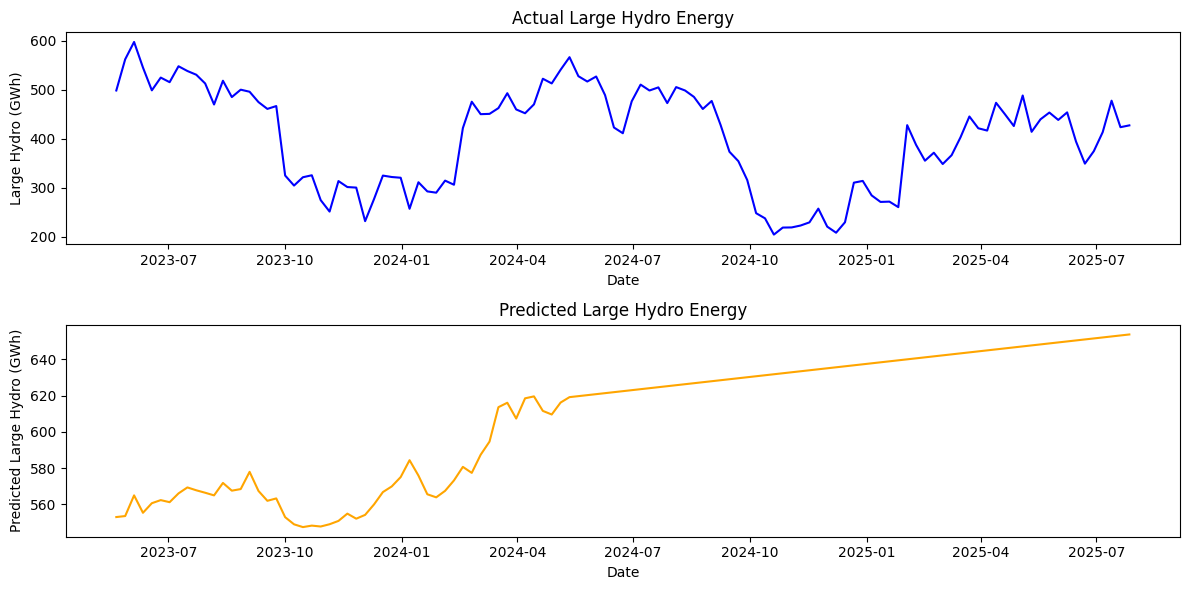

In [22]:
# Fit an auto_arima model to the large hydro training data
large_hydro_arima_model = auto_arima(
    large_hydro_train["Large Hydro"],
    seasonal=True,
    m=52,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=False
)
print(large_hydro_arima_model.summary())
predicted_large_hydro = large_hydro_arima_model.predict(n_periods=len(large_hydro_test))
actual_large_hydro = large_hydro_test['Large Hydro']
mape_large_hydro = calculate_mape(actual_large_hydro, predicted_large_hydro)
print(mape_large_hydro)
# Create two separate plots for actual and predicted large hydro data
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Actual large hydro data plot
axes[0].plot(large_hydro_test['Week_Start'], actual_large_hydro, color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Large Hydro (GWh)')
axes[0].set_title('Actual Large Hydro Energy')

# Predicted large hydro data plot
axes[1].plot(large_hydro_test['Week_Start'], predicted_large_hydro, color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Predicted Large Hydro (GWh)')
axes[1].set_title('Predicted Large Hydro Energy')

plt.tight_layout()
plt.show()

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1357.118, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1381.884, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1382.697, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1380.900, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1379.885, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1357.890, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1356.234, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1367.602, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1362.099, Time=0.01 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1358.015, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1358.815, Time=0.01 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1359.098, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1354.234, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1365.603, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]          

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

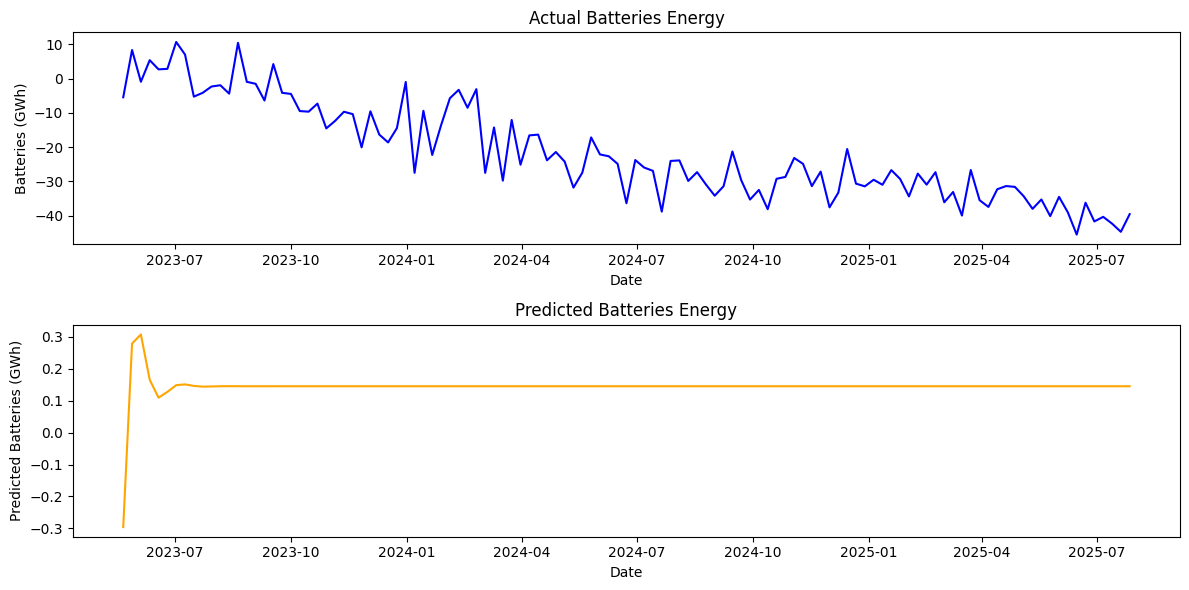

In [23]:
# Fit an auto_arima model to the battery training data
batteries_arima_model = auto_arima(
    batteries_train["Batteries"],
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)
print(batteries_arima_model.summary())
predicted_batteries = batteries_arima_model.predict(n_periods=len(batteries_test))
actual_batteries = batteries_test['Batteries']
mape_batteries = calculate_mape(actual_batteries, predicted_batteries)
print(mape_batteries)
# Create two separate plots for actual and predicted batteries data
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Actual batteries data plot
axes[0].plot(batteries_test['Week_Start'], actual_batteries, color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Batteries (GWh)')
axes[0].set_title('Actual Batteries Energy')

# Predicted batteries data plot
axes[1].plot(batteries_test['Week_Start'], predicted_batteries, color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Predicted Batteries (GWh)')
axes[1].set_title('Predicted Batteries Energy')

plt.tight_layout()
plt.show()

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=2.28 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=3398.226, Time=0.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=3392.137, Time=0.24 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=3389.221, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=3396.239, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=3387.762, Time=0.02 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=3389.027, Time=0.47 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=1.62 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=3386.347, Time=0.02 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=3386.741, Time=1.09 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=3387.163, Time=0.59 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[52] intercept   : AIC=3384.904, Time=0.05 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(1,0,0)[52] intercept   : AIC=3385.009, Time=1.15 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,1)[52] intercept   : AIC=3385.537, Time=1.29 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(1,0,1)[52] intercept   : AIC=inf, Time=2.78 sec
 ARIMA(1,1,3)(0,0,0)[52] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,4)(0,0,0)[52] intercept   : AIC=3384.863, Time=0.06 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(1,0,0)[52] intercept   : AIC=3384.386, Time=1.29 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(2,0,0)[52] intercept   : AIC=3379.096, Time=6.55 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(2,0,1)[52] intercept   : AIC=inf, Time=10.51 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(1,0,1)[52] intercept   : AIC=inf, Time=3.29 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(2,0,0)[52] intercept   : AIC=3379.074, Time=5.18 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(2,0,1)[52] intercept   : AIC=inf, Time=7.63 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,0)[52] intercept   : AIC=3381.627, Time=4.94 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(2,0,0)[52] intercept   : AIC=inf, Time=8.06 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,0)[52] intercept   : AIC=inf, Time=6.53 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(2,0,0)[52] intercept   : AIC=3377.084, Time=10.57 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(1,0,0)[52] intercept   : AIC=3386.205, Time=2.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(2,0,1)[52] intercept   : AIC=3380.313, Time=10.59 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(1,0,1)[52] intercept   : AIC=inf, Time=3.75 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(2,0,0)[52] intercept   : AIC=3383.010, Time=10.50 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,5)(2,0,0)[52] intercept   : AIC=3382.004, Time=10.58 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,5)(2,0,0)[52] intercept   : AIC=3381.089, Time=6.64 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(2,0,0)[52] intercept   : AIC=inf, Time=10.15 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,5)(2,0,0)[52] intercept   : AIC=3376.378, Time=12.34 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,5)(1,0,0)[52] intercept   : AIC=3388.929, Time=3.32 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,5)(2,0,1)[52] intercept   : AIC=3377.369, Time=13.64 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,5)(1,0,1)[52] intercept   : AIC=inf, Time=4.13 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,5)(2,0,0)[52] intercept   : AIC=inf, Time=10.67 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(2,0,0)[52] intercept   : AIC=inf, Time=10.46 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,5)(2,0,0)[52]             : AIC=3379.389, Time=11.51 sec

Best model:  ARIMA(2,1,5)(2,0,0)[52] intercept
Total fit time: 198.564 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  266
Model:             SARIMAX(2, 1, 5)x(2, 0, [], 52)   Log Likelihood               -1677.189
Date:                             Mon, 04 Aug 2025   AIC                           3376.378
Time:                                     13:06:04   BIC                           3415.755
Sample:                                          0   HQIC                          3392.199
                                             - 266                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


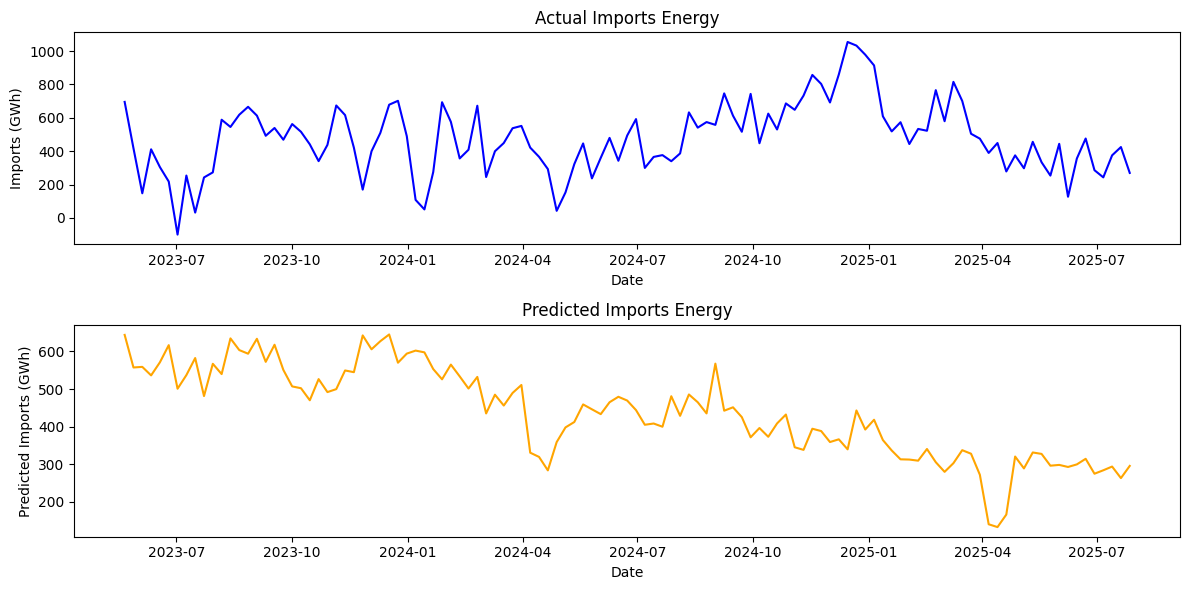

In [26]:
# Fit an auto_arima model to the imports training data
imports_arima_model = auto_arima(
    imports_train["Imports"],
    seasonal=True,
    m=52,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)
print(imports_arima_model.summary())
predicted_imports = imports_arima_model.predict(n_periods=len(imports_test))
actual_imports = imports_test['Imports']
mape_imports = calculate_mape(actual_imports, predicted_imports)
print(mape_imports)
# Create two separate plots for actual and predicted imports data
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Actual imports data plot
axes[0].plot(imports_test['Week_Start'], actual_imports, color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Imports (GWh)')
axes[0].set_title('Actual Imports Energy')

# Predicted imports data plot
axes[1].plot(imports_test['Week_Start'], predicted_imports, color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Predicted Imports (GWh)')
axes[1].set_title('Predicted Imports Energy')

plt.tight_layout()
plt.show()

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=3693.696, Time=2.83 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=4129.528, Time=0.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=3700.667, Time=0.76 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=3879.987, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=5198.392, Time=0.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=3696.890, Time=1.55 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=inf, Time=2.06 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=3692.127, Time=9.77 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=inf, Time=14.42 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(2,0,2)[52] intercept   : AIC=inf, Time=12.42 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,0,2)[52] intercept   : AIC=3691.922, Time=11.42 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,2)[52] intercept   : AIC=3693.795, Time=6.12 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,0,2)[52] intercept   : AIC=3692.059, Time=6.57 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,2)[52] intercept   : AIC=3691.039, Time=8.04 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,2)[52] intercept   : AIC=3692.305, Time=3.91 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,1)[52] intercept   : AIC=3694.044, Time=2.38 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,0,2)[52] intercept   : AIC=inf, Time=9.54 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,1)[52] intercept   : AIC=3695.852, Time=0.99 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,0,1)[52] intercept   : AIC=3691.181, Time=7.25 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,2)[52] intercept   : AIC=3690.195, Time=5.56 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,2)[52] intercept   : AIC=3690.373, Time=2.49 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=3695.046, Time=1.32 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,2)[52] intercept   : AIC=inf, Time=8.80 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,1)[52] intercept   : AIC=3694.401, Time=0.40 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,1)[52] intercept   : AIC=3690.332, Time=5.98 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,2)[52] intercept   : AIC=inf, Time=7.23 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,2)[52] intercept   : AIC=3697.948, Time=2.58 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,2)[52] intercept   : AIC=inf, Time=5.10 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(1,0,2)[52] intercept   : AIC=inf, Time=9.13 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,2)[52] intercept   : AIC=3689.265, Time=5.89 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,2)[52] intercept   : AIC=3691.416, Time=3.11 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,1)[52] intercept   : AIC=3692.832, Time=1.47 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,0,2)[52] intercept   : AIC=inf, Time=9.07 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,1)[52] intercept   : AIC=3694.279, Time=0.43 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,0,1)[52] intercept   : AIC=3689.401, Time=5.70 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(1,0,2)[52] intercept   : AIC=3689.413, Time=7.76 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(1,0,2)[52] intercept   : AIC=3688.279, Time=10.09 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,2)[52] intercept   : AIC=3694.242, Time=5.57 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(1,0,1)[52] intercept   : AIC=3690.677, Time=2.63 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(2,0,2)[52] intercept   : AIC=inf, Time=11.61 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,1)[52] intercept   : AIC=3697.671, Time=1.48 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(2,0,1)[52] intercept   : AIC=3688.599, Time=10.66 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(1,0,2)[52] intercept   : AIC=3691.829, Time=10.94 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(1,0,2)[52] intercept   : AIC=3690.079, Time=11.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(1,0,2)[52] intercept   : AIC=3690.576, Time=8.13 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(1,0,2)[52] intercept   : AIC=3690.998, Time=13.41 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(1,0,2)[52]             : AIC=inf, Time=8.76 sec

Best model:  ARIMA(3,0,1)(1,0,2)[52] intercept
Total fit time: 277.217 seconds
                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  266
Model:             SARIMAX(3, 0, 1)x(1, 0, [1, 2], 52)   Log Likelihood               -1835.140
Date:                                 Sun, 03 Aug 2025   AIC                           3688.279
Time:                                         21:33:22   BIC                           3720.531
Sample:                                              0   HQIC                          3701.236
                                                 - 266                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


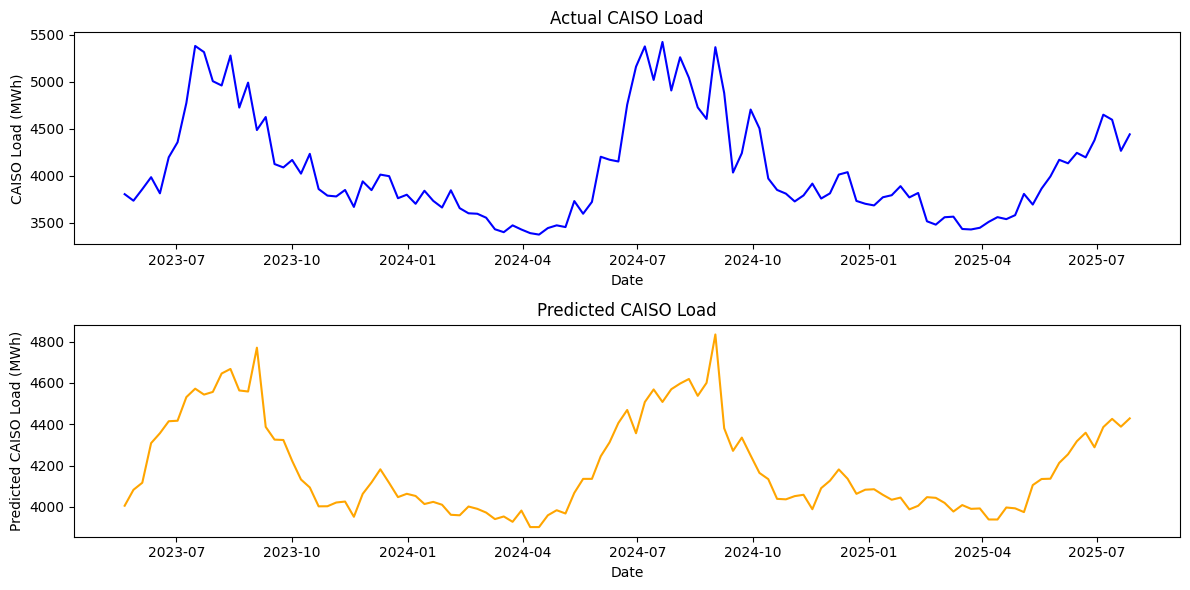

In [ ]:
# Fit an auto_arima model to the load training data
load_arima_model = auto_arima(
    load_train["CAISO_Load_GWh"],
    seasonal=True,
    m=52,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)
print(load_arima_model.summary())
predicted_load = load_arima_model.predict(n_periods=len(load_test))
actual_load = load_test['CAISO_Load_GWh']
mape_load = calculate_mape(actual_load, predicted_load)
print(mape_load)
# Create two separate plots for actual and predicted load data
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Actual load data plot
axes[0].plot(load_test['Week_Start'], actual_load, color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('CAISO Load (GWh)')
axes[0].set_title('Actual CAISO Load')

# Predicted load data plot
axes[1].plot(load_test['Week_Start'], predicted_load, color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Predicted CAISO Load (GWh)')
axes[1].set_title('Predicted CAISO Load')

plt.tight_layout()
plt.show()


In [32]:
import pickle

# Save the ARIMA models to files
with open('load_arima_model.pkl', 'wb') as f:
    pickle.dump(load_arima_model, f)

In [47]:
df_bev = pd.read_csv("caiso_weekly_fuel_mix_load_and_bev_imputed_GWh.csv", parse_dates=["Week_Start", "Week_End"])

In [48]:
# Calculate the split point (70% of data)
split_point = int(len(df_bev) * 0.7)

# Split each imputed time series into training and testing sets
# Solar
bev_train = df_bev.iloc[:split_point]
bev_test = df_bev.iloc[split_point:]

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=3693.696, Time=2.72 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=4129.528, Time=0.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=3700.667, Time=0.74 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=3879.987, Time=0.74 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=5198.392, Time=0.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=3696.890, Time=1.47 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=inf, Time=2.04 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=3692.127, Time=9.77 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=inf, Time=14.38 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(2,0,2)[52] intercept   : AIC=inf, Time=12.37 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,0,2)[52] intercept   : AIC=3691.922, Time=11.35 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,2)[52] intercept   : AIC=3693.795, Time=6.17 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,0,2)[52] intercept   : AIC=3692.059, Time=6.55 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,2)[52] intercept   : AIC=3691.039, Time=8.16 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,2)[52] intercept   : AIC=3692.305, Time=3.94 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,1)[52] intercept   : AIC=3694.044, Time=2.39 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,0,2)[52] intercept   : AIC=inf, Time=9.57 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,1)[52] intercept   : AIC=3695.852, Time=0.99 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,0,1)[52] intercept   : AIC=3691.181, Time=7.32 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,2)[52] intercept   : AIC=3690.195, Time=5.56 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,2)[52] intercept   : AIC=3690.373, Time=2.57 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=3695.046, Time=1.22 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,2)[52] intercept   : AIC=inf, Time=9.95 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,1)[52] intercept   : AIC=3694.401, Time=0.43 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,1)[52] intercept   : AIC=3690.332, Time=6.05 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,2)[52] intercept   : AIC=inf, Time=7.17 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,2)[52] intercept   : AIC=3697.948, Time=2.56 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,2)[52] intercept   : AIC=inf, Time=5.04 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(1,0,2)[52] intercept   : AIC=inf, Time=8.88 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,2)[52] intercept   : AIC=3689.265, Time=5.89 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,2)[52] intercept   : AIC=3691.416, Time=3.02 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,1)[52] intercept   : AIC=3692.832, Time=1.51 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,0,2)[52] intercept   : AIC=inf, Time=9.05 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,1)[52] intercept   : AIC=3694.279, Time=0.48 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,0,1)[52] intercept   : AIC=3689.401, Time=5.82 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(1,0,2)[52] intercept   : AIC=3689.413, Time=7.87 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(1,0,2)[52] intercept   : AIC=3688.279, Time=10.17 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,2)[52] intercept   : AIC=3694.242, Time=5.65 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(1,0,1)[52] intercept   : AIC=3690.677, Time=2.64 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(2,0,2)[52] intercept   : AIC=inf, Time=11.57 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,1)[52] intercept   : AIC=3697.671, Time=1.46 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(2,0,1)[52] intercept   : AIC=3688.599, Time=10.81 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(1,0,2)[52] intercept   : AIC=3691.829, Time=11.02 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(1,0,2)[52] intercept   : AIC=3690.079, Time=11.07 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(1,0,2)[52] intercept   : AIC=3690.576, Time=8.17 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(1,0,2)[52] intercept   : AIC=3690.998, Time=13.49 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(1,0,2)[52]             : AIC=inf, Time=9.01 sec

Best model:  ARIMA(3,0,1)(1,0,2)[52] intercept
Total fit time: 278.995 seconds
                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  266
Model:             SARIMAX(3, 0, 1)x(1, 0, [1, 2], 52)   Log Likelihood               -1835.140
Date:                                 Mon, 04 Aug 2025   AIC                           3688.279
Time:                                         18:33:43   BIC                           3720.531
Sample:                                              0   HQIC                          3701.236
                                                 - 266                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


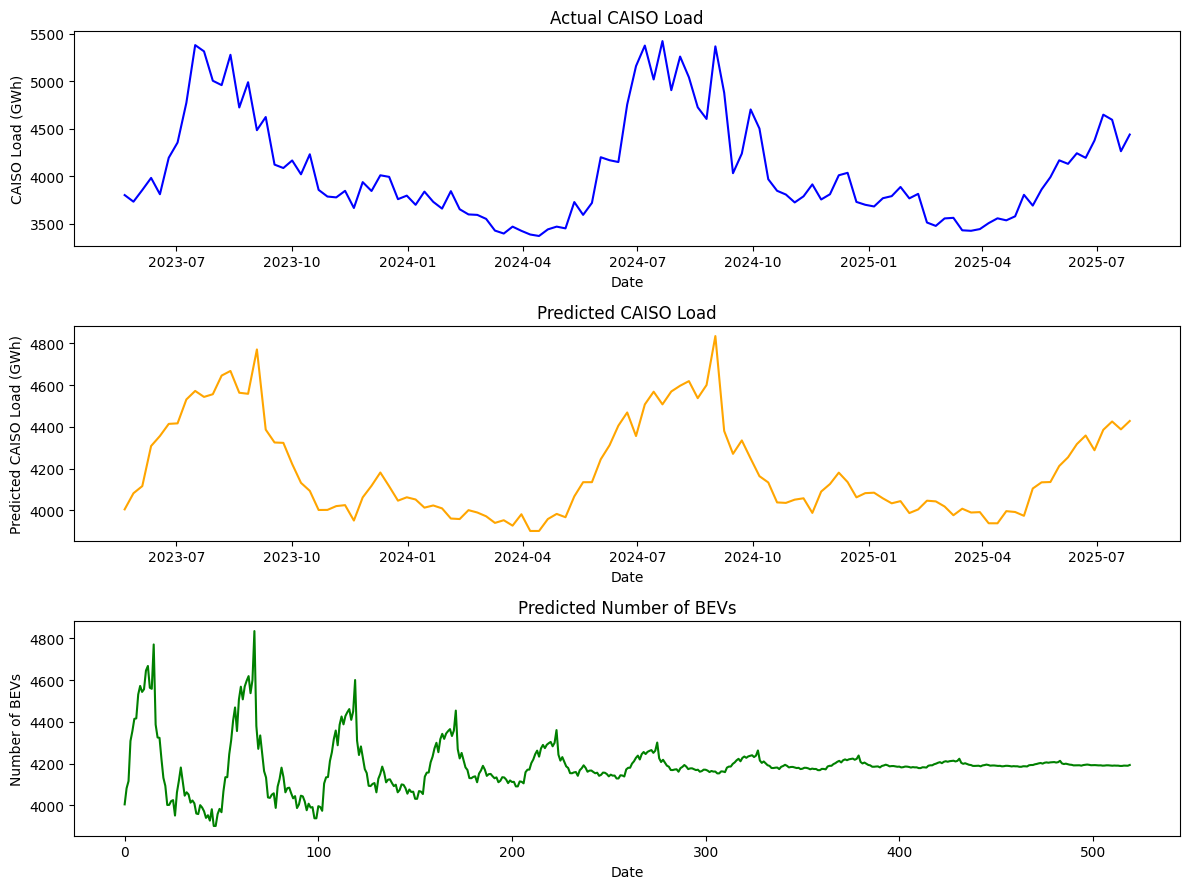

<Figure size 640x480 with 0 Axes>

In [60]:
# Fit an auto_arima model to the load training data
load_arima_model = auto_arima(
    load_train["CAISO_Load_GWh"],
    seasonal=True,
    m=52,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    # exogenous=bev_train["bev"]
)
print(load_arima_model.summary())
predicted_load = load_arima_model.predict(n_periods=len(load_test))
actual_load = load_test['CAISO_Load_GWh']
mape_load = calculate_mape(actual_load, predicted_load)
print(mape_load)
# Create two separate plots for actual and predicted load data
fig, axes = plt.subplots(3, 1, figsize=(12, 9))

# Actual load data plot
axes[0].plot(load_test['Week_Start'], actual_load, color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('CAISO Load (GWh)')
axes[0].set_title('Actual CAISO Load')

# Predicted load data plot
axes[1].plot(load_test['Week_Start'], predicted_load, color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Predicted CAISO Load (GWh)')
axes[1].set_title('Predicted CAISO Load')

extrapolated_load = load_arima_model.predict(n_periods=520)

axes[2].plot(np.arange(520), extrapolated_load, color='green')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Number of BEVs')
axes[2].set_title('Predicted Number of BEVs')


plt.tight_layout()
plt.show()


In [54]:
df_bev = pd.read_csv("bev_by_week.csv", parse_dates=["Date"])
# Calculate the split point (70% of data)
split_point = int(len(df_bev) * 0.7)

# Split each imputed time series into training and testing sets
# Solar
bev_train = df_bev.iloc[:split_point]
bev_test = df_bev.iloc[split_point:]

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3113.495, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3071.256, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=3070.858, Time=0.04 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=3072.592, Time=0.07 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=3074.513, Time=0.10 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=3076.507, Time=0.17 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3082.181, Time=0.03 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3070.613, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=3072.511, Time=0.09 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=3074.741, Time=0.10 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=3076.532, Time=0.11 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=3075.786, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=3072.521, Time=0.05 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=3074.585, Time=0.06 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=3076.495, Time=0.11 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=3074.910, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=3074.501, Time=0.10 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=3076.499, Time=0.07 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=3075.548, Time=0.07 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=3076.725, Time=0.12 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=3077.071, Time=0.07 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0] intercept
Total fit time: 1.546 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  256
Model:               SARIMAX(1, 2, 1)   Log Likelihood               -1531.306
Date:                Mon, 04 Aug 2025   AIC                           3070.613
Time:                        18:23:38   BIC                           3084.762
Sample:                             0   HQIC                          3076.305
                                - 256                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     17.7318     13.560      1.308      0.191      -8.845 

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


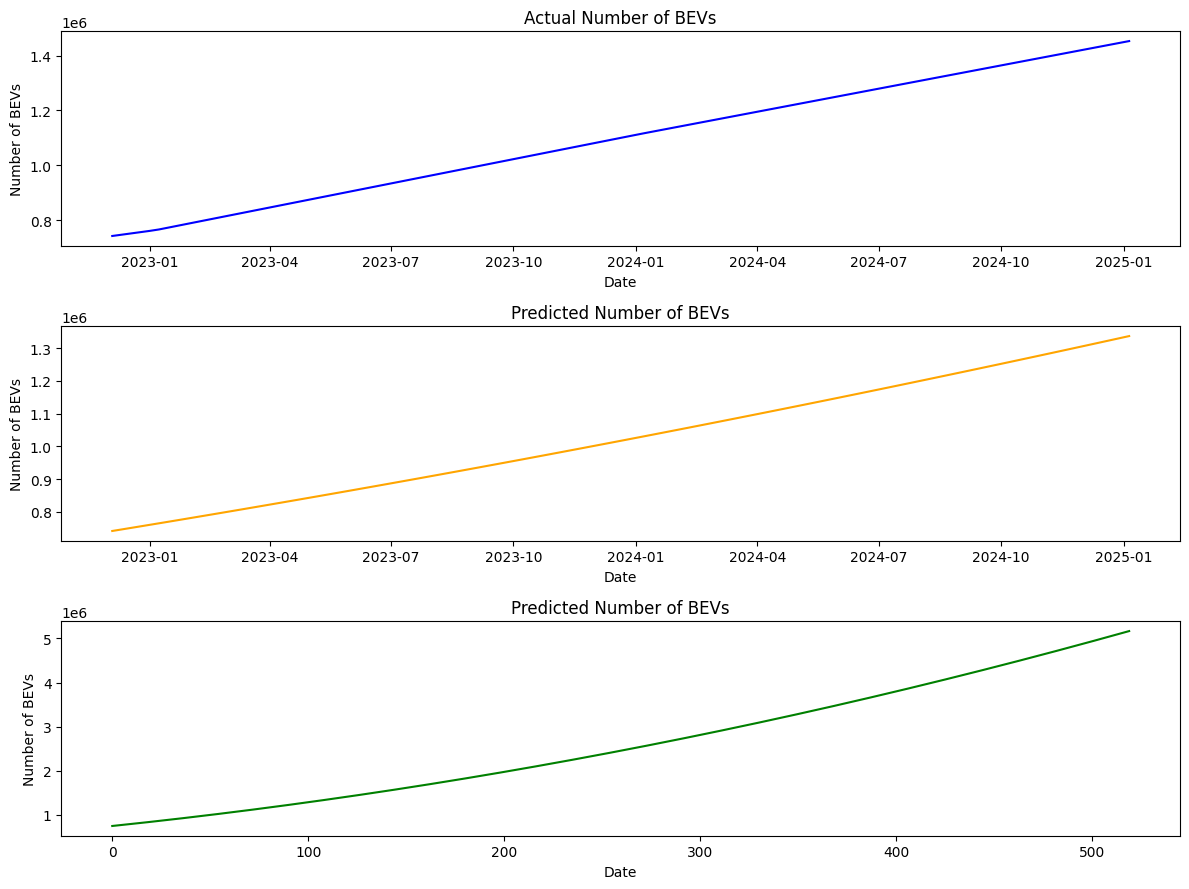

In [57]:
# Fit an auto_arima model to the coal training data
bev_arima_model = auto_arima(
    bev_train["Number of BEVs"],
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=False
)
print(bev_arima_model.summary())
predicted_bev = bev_arima_model.predict(n_periods=len(bev_test))
actual_bev = bev_test['Number of BEVs']
mape_bev = calculate_mape(actual_bev, predicted_bev)
print(mape_bev)
# Create two separate plots for actual and predicted coal data
fig, axes = plt.subplots(3, 1, figsize=(12, 9))

# Actual coal data plot
axes[0].plot(bev_test['Date'], actual_bev, color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of BEVs')
axes[0].set_title('Actual Number of BEVs')

# Predicted coal data plot
axes[1].plot(bev_test['Date'], predicted_bev, color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of BEVs')
axes[1].set_title('Predicted Number of BEVs')

extrapolated_bev = bev_arima_model.predict(n_periods=520)

axes[2].plot(np.arange(520), extrapolated_bev, color='green')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Number of BEVs')
axes[2].set_title('Predicted Number of BEVs')


plt.tight_layout()
plt.show()

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


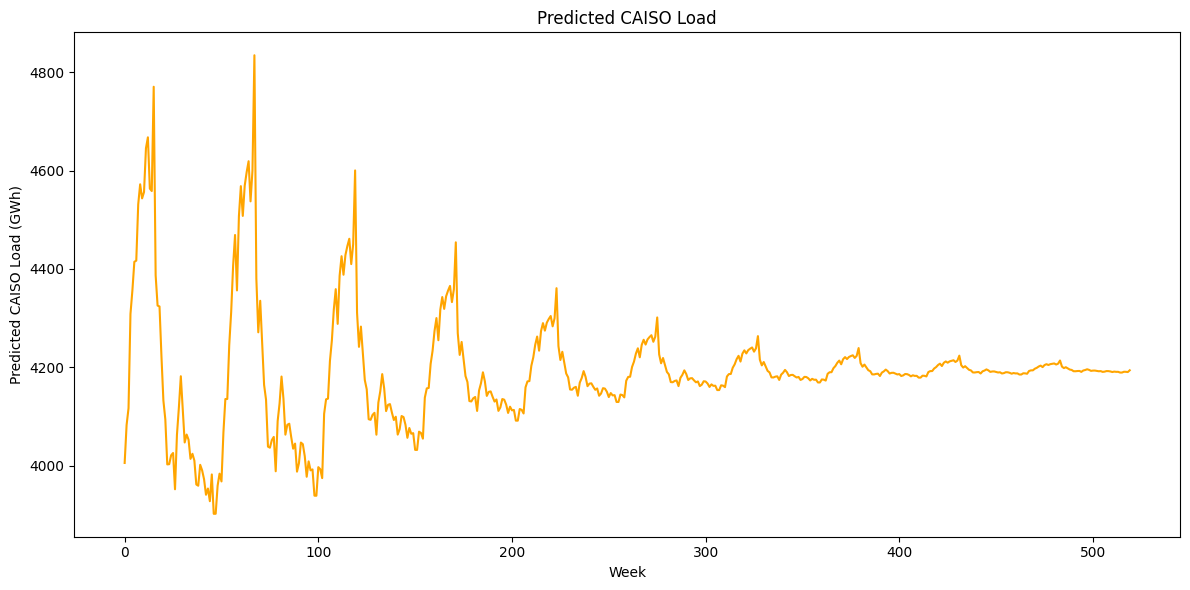

In [59]:
predicted_load = load_arima_model.predict(n_periods=520, exogenous=extrapolated_bev)
# Create two separate plots for actual and predicted load data
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

# Predicted load data plot
axes.plot(np.arange(520), predicted_load, color='orange')
axes.set_xlabel('Week')
axes.set_ylabel('Predicted CAISO Load (GWh)')
axes.set_title('Predicted CAISO Load')

plt.tight_layout()
plt.show()


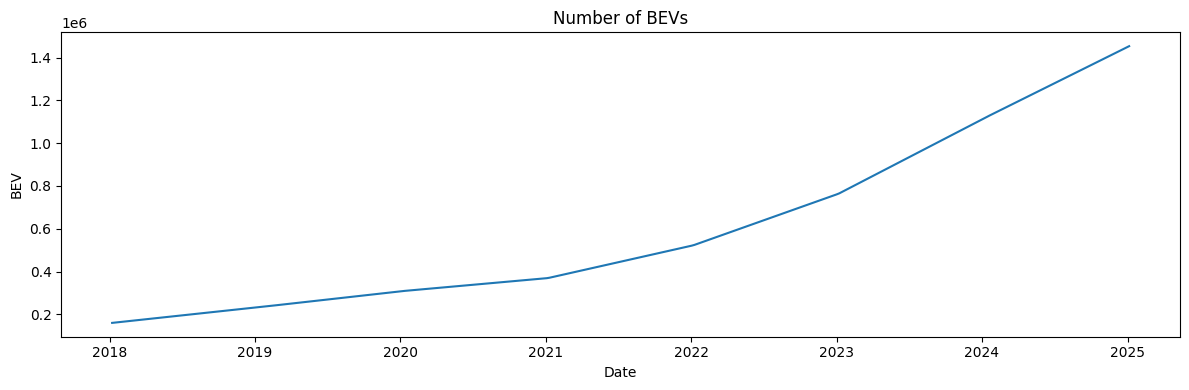

In [45]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df_bev["Date"], df_bev["Number of BEVs"])

ax.set_xlabel("Date")
ax.set_ylabel("BEV")
ax.set_title("Number of BEVs")

plt.tight_layout()
plt.show()

         INTERVALENDTIME_GMT    MW
0  2025-07-02T00:00:00-00:00  1905
1  2025-07-01T08:00:00-00:00  1087
2  2025-07-01T12:00:00-00:00   946
3  2025-07-01T11:00:00-00:00   933
4  2025-07-01T21:00:00-00:00  1770
